In [27]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

text = "This is a test. Let's see if it works."
print(sent_tokenize(text))

['This is a test.', "Let's see if it works."]


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('/kaggle/input/spam-classifier/spam.csv', encoding='ISO-8859-1')

In [30]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2441,ham,Back in brum! Thanks for putting us up and kee...,NaN,NaN,NaN
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...,NaN,NaN,NaN
5028,spam,I'd like to tell you my deepest darkest fantas...,NaN,NaN,NaN
4780,ham,Yup... Hey then one day on fri we can ask miwa...,NaN,NaN,NaN
2357,ham,Okay same with me. Well thanks for the clarifi...,NaN,NaN,NaN
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN
3598,ham,Then wat r u doing now? Busy wif work?,NaN,NaN,NaN
2670,ham,Yes. They replied my mail. I'm going to the ma...,NaN,NaN,NaN
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...,NaN,NaN,NaN
1213,ham,"Yeah, probably but not sure. Ilol let u know, ...",NaN,NaN,NaN


In [31]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

# 1. Cleaning data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [33]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
df['target'] = encoder.fit_transform(df['target'])

In [36]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [37]:
df = df.drop_duplicates(keep='first')

In [38]:
df.duplicated().sum()

0

In [49]:
df.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace = True)

# 2 . EDA

In [43]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b7811228b50>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

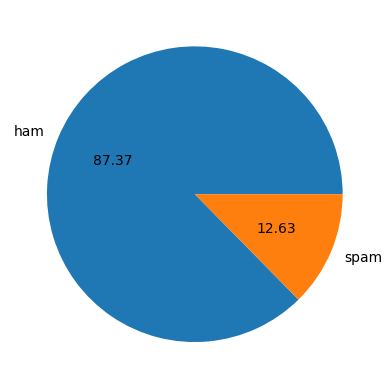

In [45]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")

data is imbalanced

In [47]:
df['num_characters'] = df['text'].apply(len)

In [51]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [53]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [59]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

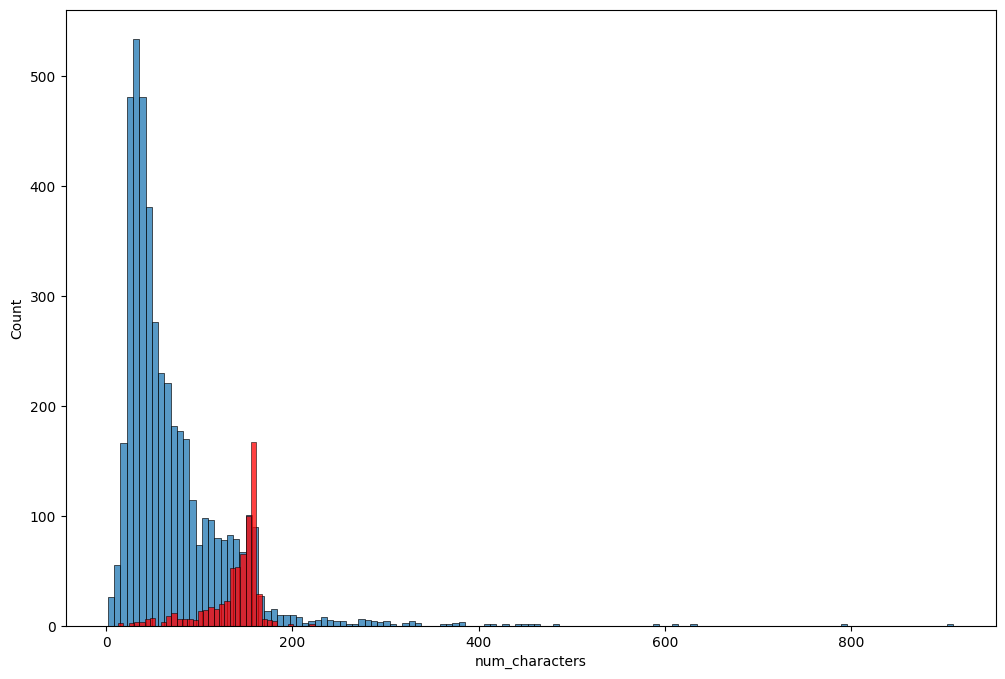

In [61]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

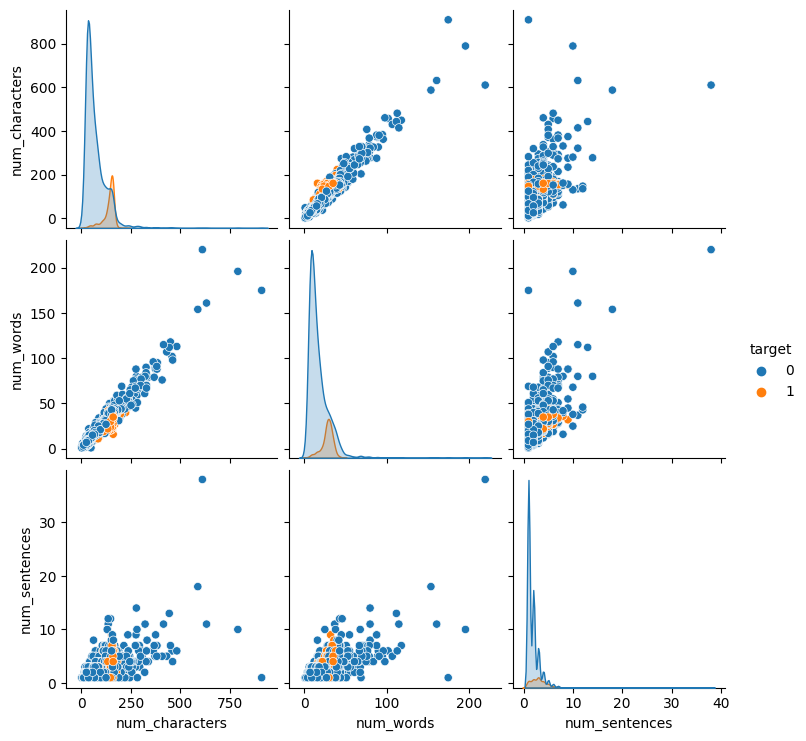

In [63]:
sns.pairplot(df,hue='target')

# 3 . Data Preprocessing

Lower case

Tokenization

Remove special characters

Removing stop words and punctuation

Stemming

In [93]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    cleaned = [word for word in tokens if word.isalnum()]

    stop_words = set(stopwords.words('english'))
    final = [word for word in cleaned if word not in stop_words]
    ps = PorterStemmer()
    final = [ps.stem(word) for word in final]
    return " ".join(final)

In [94]:
transform_text("Hey! This is a simple tests, just to see if it works.")

'hey simpl test see work'

In [95]:
df['transformed_text'] = df['text'].apply(transform_text)

In [105]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 1000,min_font_size=10,background_color = 'black')

In [106]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

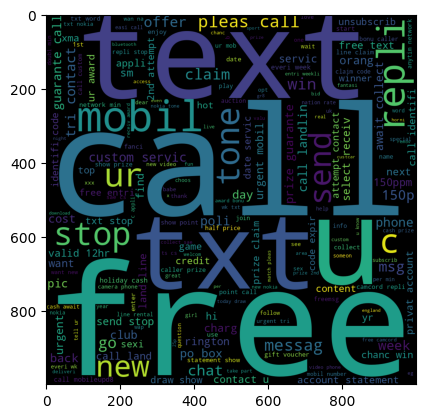

In [107]:
plt.imshow(spam_wc)

In [108]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

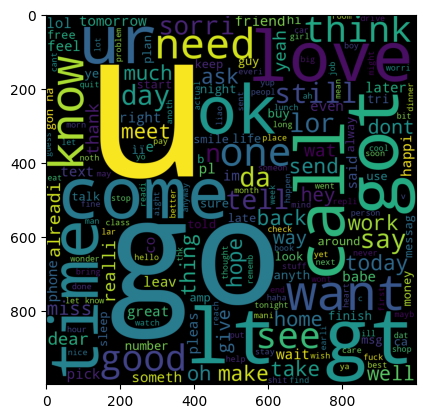

In [109]:
plt.imshow(ham_wc)

In [113]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [115]:
from collections import Counter

word_freq = Counter(spam_corpus).most_common(30)
print(word_freq)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


# 4 . Model Building

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [117]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [118]:
X.shape

(5169, 6708)

In [120]:
Y = df['target'].values

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [132]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [133]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [134]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [136]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [137]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [138]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [139]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [140]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9154929577464789
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [142]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False) 

In [143]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
7,BgC,0.962282,0.915966
3,DT,0.923598,0.915493
2,NB,0.964217,0.834437


In [144]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [145]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,BgC,Accuracy,0.962282
8,DT,Accuracy,0.923598
9,NB,Accuracy,0.964217


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


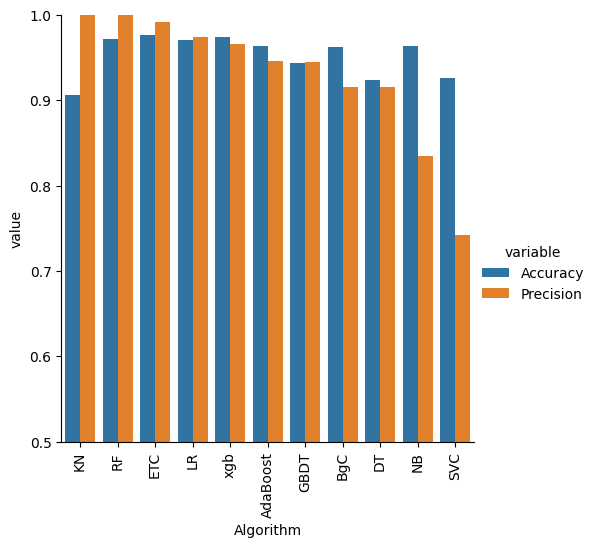

In [146]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
8,DT,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437
